In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Q3 b) 
Get the implementation of the logic functions AND, OR, COMPLEMENT 
and NAND, with different learning rate.

In [2]:
X = np.array([[1,0,0], [1,0,1], [1,1,0], [1,1,1]])
y_and = np.array([0,0,0,1])
y_or = np.array([0,1,1,1])
y_nand = np.array([1,1,1,0])

X_complement = np.array([[1,0], [1,1]])
y_complement = np.array([1,0])

In [3]:
def learn_perceptron(X, y, lr, title):
    rows = np.shape(X)[0]
    dim = np.shape(X)[1]
    #Initial weight
    w = np.random.rand(dim)
    weight_array = np.copy(w)

    for j in range(20):
        i = 0
        for i in range(rows):
            v = np.dot(X[i,:],w)
            if v >= 0:
                v = 1
            else:
                v = 0
            e = y[i]-v
            w = w + lr*e*X[i,:]
            weight_array = np.append(weight_array,w)
            i = i+1
    print("w:", w) 
    total_iter = i*(j+1)
    weight_array = np.reshape(weight_array, (total_iter+1,3))

    b = w[1]/w[2]
    c = w[0]/w[2]
    """Plot the AND Implementation and weight changing trajectories versus iteration"""
    a = np.arange(3)    
    step = np.arange(total_iter+1)
    fig, axes = plt.subplots(2, 1, figsize=(8, 8))
    axes[0].plot(a,-(b*a)-c)
    signal_0 = 0
    signal_1 = 0
    for i in range(rows):
        if y[i]==0:
            if signal_0==0:
                signal_0 = 1
                axes[0].scatter(X[i,1],X[i,2],color = 'red',label = 'class y = 0')
            else:
                axes[0].scatter(X[i,1],X[i,2],color = 'red')
        else:
            if signal_1==0:
                signal_1 = 1
                axes[0].scatter(X[i,1],X[i,2],color = 'green',label = 'class y = 1')
            else:
                axes[0].scatter(X[i,1],X[i,2],color = 'green')

    axes[0].legend(loc = 'best')
    axes[0].set_xlabel('Value of x1')
    axes[0].set_ylabel('Value of x2')
    axes[0].set_title(title)
    axes[1].plot(step, weight_array[:,0],label = 'weight change for bias')
    axes[1].plot(step, weight_array[:,1],label = 'weight change for x1')
    axes[1].plot(step, weight_array[:,2],label = 'weight change for x2')
    axes[1].legend(loc = 'best')
    axes[1].set_xlabel('Iteration' )
    axes[1].set_ylabel('Weight value')

w: [-2.87506543  2.53915842  1.06677419]
w: [-0.44764221  0.27562845  0.24697067]
w: [-29.67081372  20.92508761  10.21596403]


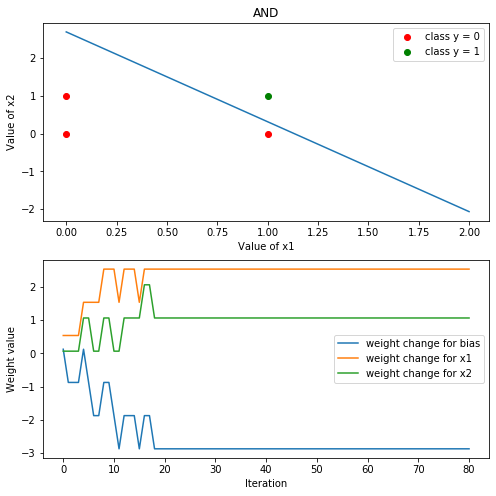

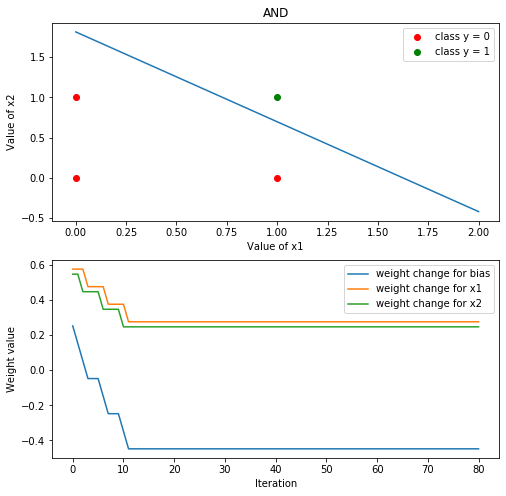

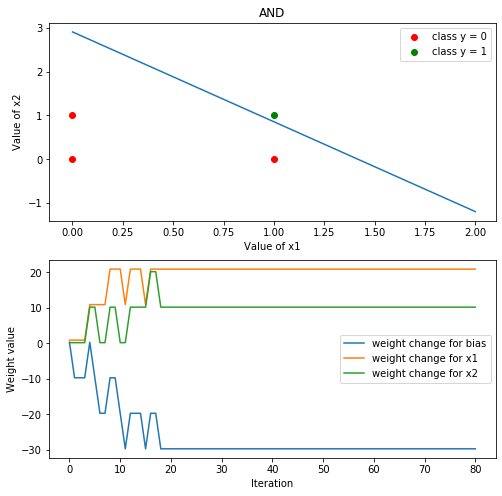

In [14]:
learn_perceptron(X, y_and, lr=1, title='AND')
learn_perceptron(X, y_and, lr=0.1, title='AND')
learn_perceptron(X, y_and, lr=10, title='AND')

w: [-0.52050405  0.99075222  0.70576858]
w: [-0.06043808  0.23057775  0.35135828]
w: [-9.10958905 10.89274433 10.17440308]


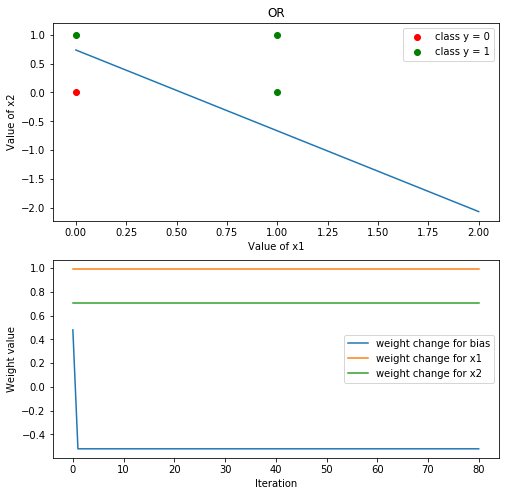

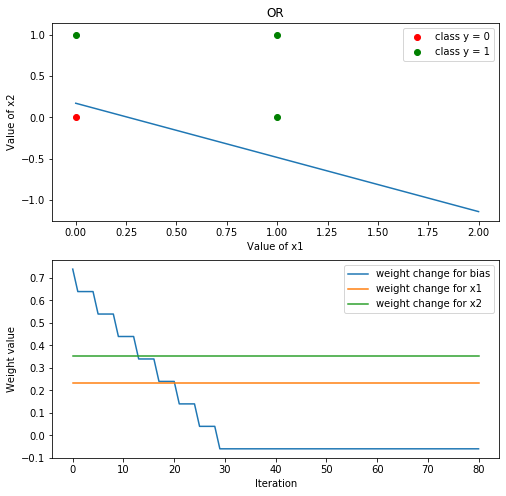

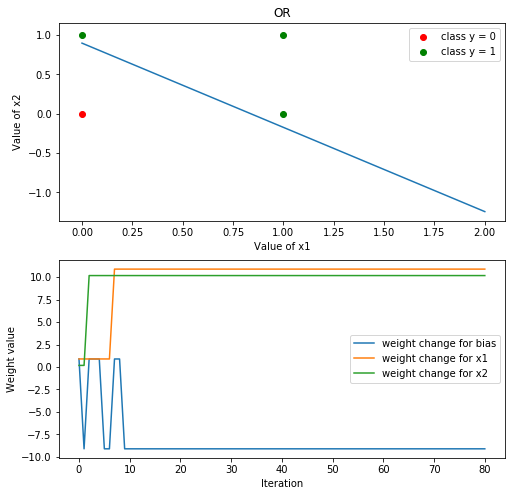

In [10]:
learn_perceptron(X, y_or, lr=1, title='OR')
learn_perceptron(X, y_or, lr=0.1, title='OR')
learn_perceptron(X, y_or, lr=10, title='OR')

w: [ 3.30087943 -2.37056202 -1.53499721]
w: [ 0.21326123 -0.18450775 -0.08106311]
w: [ 20.46347763 -19.54557219  -9.44651491]


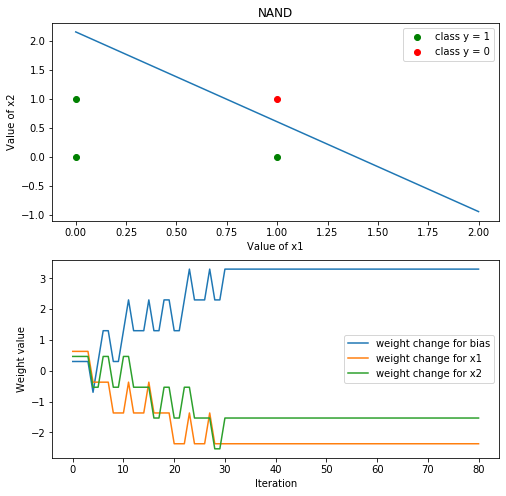

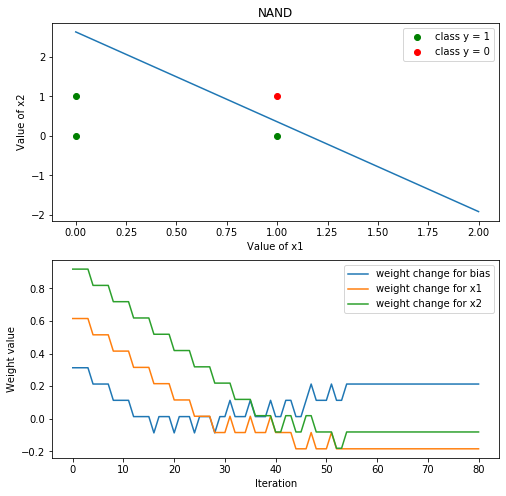

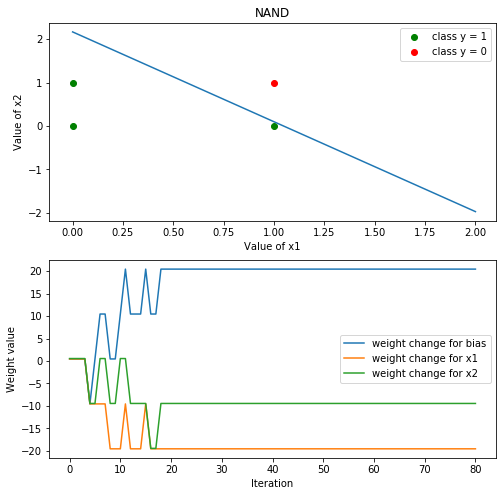

In [11]:
learn_perceptron(X, y_nand, lr=1, title='NAND')
learn_perceptron(X, y_nand, lr=0.1, title='NAND')
learn_perceptron(X, y_nand, lr=10, title='NAND')

In [7]:
def Complement(X, y, lr, title):
    rows = np.shape(X)[0]
    dim = np.shape(X)[1]
    #Initial weight
    w = np.random.rand(dim)
    weight_array = np.copy(w)

    for j in range(20):
        i = 0
        for i in range(rows):
            v = np.dot(X[i,:],w)
            if v >= 0:
                v = 1
            else:
                v = 0
            e = y[i]-v
            w = w + lr*e*X[i,:]
            weight_array = np.append(weight_array,w)
            i = i+1
    print("w:", w) 
    total_iter = i*(j+1)
    weight_array = np.reshape(weight_array, (total_iter+1,2))
    b = w[0]
    C = w[1]

    
    a = np.arange(3)    
    step = np.arange(total_iter+1)
    fig, axes = plt.subplots(2, 1, figsize=(8, 8))
    axes[0].axvline(x = (-w[0])/w[1])
    axes[0].scatter(0,0,color = 'green',label = 'class y =1')
    axes[0].scatter(1,0,color = 'red',label = 'class y =0')
    axes[0].legend(loc = 'best')
    axes[0].set_xlabel('Value of x')
    axes[0].set_title(title)
    axes[1].plot(step, weight_array[:,0],label = 'weight change for bias')
    axes[1].plot(step, weight_array[:,1],label = 'weight change for x')
    axes[1].legend(loc = 'best')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('Weight value')

w: [ 0.24689369 -1.14786506]
w: [ 0.02404743 -0.19567492]
w: [ 0.43713069 -9.37086874]


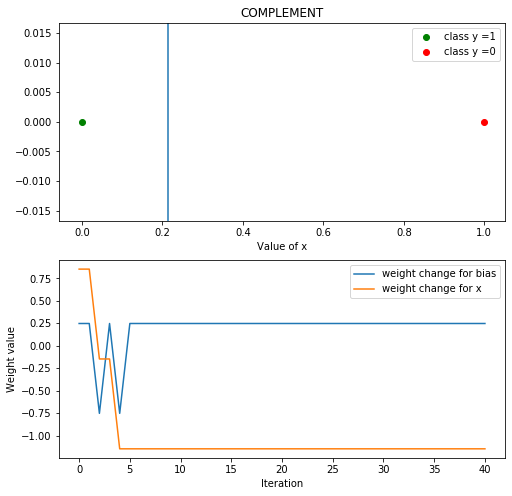

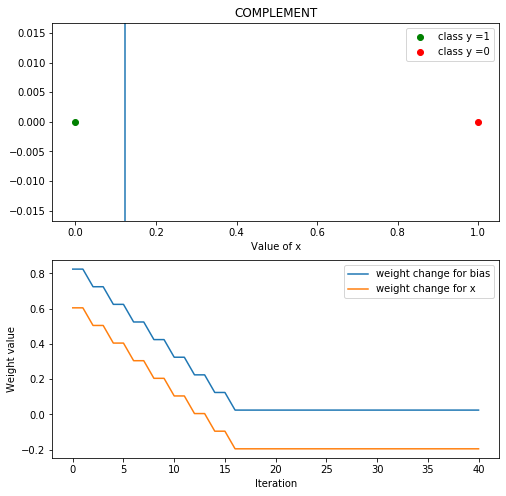

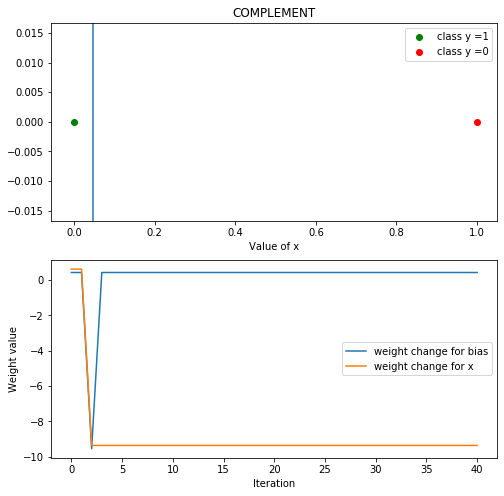

In [8]:
Complement(X_complement, y_complement, lr=1, title='COMPLEMENT')
Complement(X_complement, y_complement, lr=0.1, title='COMPLEMENT')
Complement(X_complement, y_complement, lr=10, title='COMPLEMENT')

### Q3 c)
Try implement XOR

w: [ 0.16703441 -0.49311069  0.0458683 ]


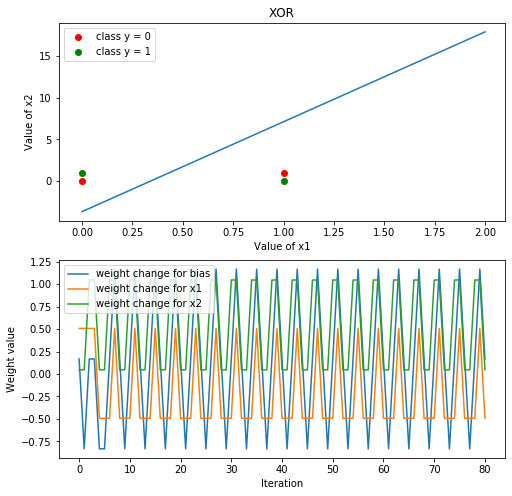

In [9]:
X = np.array([[1,0,0], [1,0,1], [1,1,0], [1,1,1]])
y_xor = np.array([0,1,1,0])
learn_perceptron(X, y_xor, lr=1, title='XOR')